In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
sns.set()


from sklearn.linear_model import LinearRegression

# Introduction

We have a data of Forbes Billionaires from  <a href= "https://www.kaggle.com/datasets/surajjha101/forbes-billionaires-data-preprocessed" >kaggle</a> in 2022. 

At the time of extracting the data from the kaggle, the latest update of the dataset was 2 months ago. 


# Research questions 

- Which industry has the most billionaires? 
- Which country has the most billionaires? 
- Show age distribution of the billionaires. 
- Can age and industry predict being richer using linear regression model? 


# Importing data 

In [2]:
data= pd.read_csv('Forbes Billionaires.csv')
data

,Rank,Name,Networth,Age,Country,Source,Industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


# Which industry has the most billionaires?

In [48]:
counts= data.groupby('Industry').count()['Name']          # counts of billionaires by industries 
counts 

Industry
Automotive                      69
Construction & Engineering      43
Energy                          93
Fashion & Retail               246
Finance & Investments          386
Food & Beverage                201
Gambling & Casinos              23
Healthcare                     212
Logistics                       35
Manufacturing                  322
Media & Entertainment           95
Metals & Mining                 67
Real Estate                    189
Service                         51
Sports                          26
Technology                     329
Telecom                         35
diversified                    178
Name: Name, dtype: int64

Text(0.5, 1.0, 'Number of billionaires by industries')

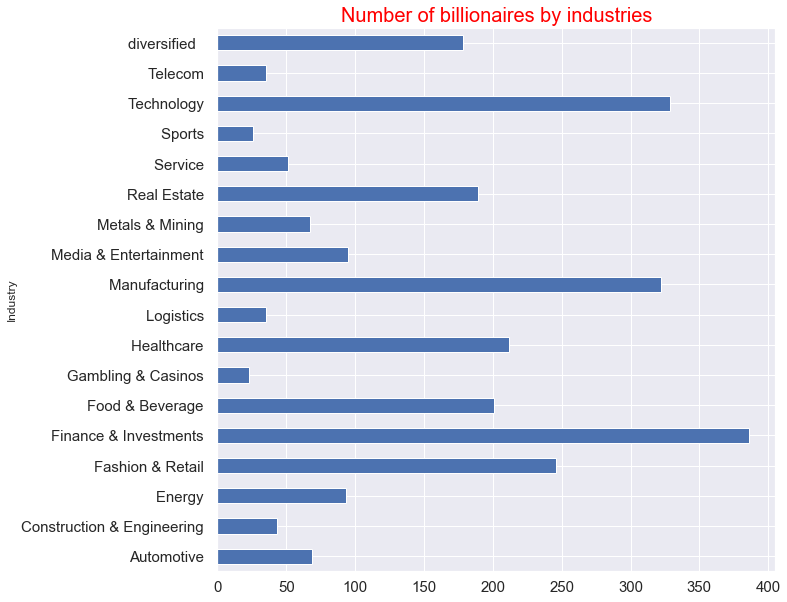

In [51]:
counts.plot.barh(figsize=(10,10), fontsize=15)       # horizontal bar plot  
plt.title('Number of billionaires by industries', fontdict={'color': 'red', 'fontsize': 20})

In [26]:
counts.sort_values(ascending=False).head(10)               # top 10 industries 

Industry
Finance & Investments     386
Technology                329
Manufacturing             322
Fashion & Retail          246
Healthcare                212
Food & Beverage           201
Real Estate               189
diversified               178
Media & Entertainment      95
Energy                     93
Name: Name, dtype: int64

In [54]:
top10_counts= pd.DataFrame(counts.sort_values(ascending=False).head(10)  ).reset_index()

In [56]:
top10_counts.index+=1

In [57]:
top10_counts

,Industry,Name
1,Finance & Investments,386
2,Technology,329
3,Manufacturing,322
4,Fashion & Retail,246
5,Healthcare,212
6,Food & Beverage,201
7,Real Estate,189
8,diversified,178
9,Media & Entertainment,95
10,Energy,93


# Which country has the most billionaires?

In [31]:
counts= data.groupby('Country').count().iloc[:, 0]  # counts of billionaires by countries 
counts= counts.sort_values(ascending=False)         # order values in descending order 

In [34]:
top10_counts= counts.head(10)   # top 10 countries with most billionaires 

In [35]:
top10_counts

Country
United States    719
China            515
India            161
Germany          130
Russia            81
Hong Kong         67
Canada            64
Brazil            60
Italy             52
Taiwan            51
Name: Rank , dtype: int64

<AxesSubplot:ylabel='Country'>

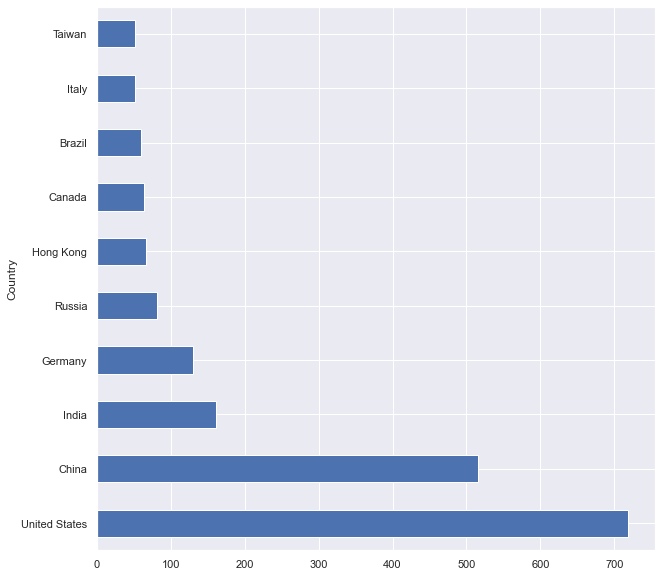

In [36]:
top10_counts.plot.barh(figsize=(10,10))

# Show age distribution of the billionaires.

<AxesSubplot:ylabel='Frequency'>

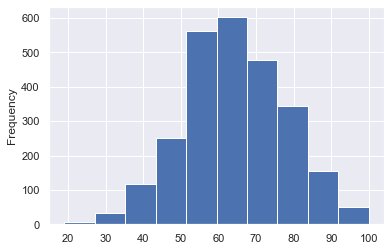

In [46]:
data['Age'].plot.hist()  # counts of billionaires by age

In [44]:
counts.index

Int64Index([ 19,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
             37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
             50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
             63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
             76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
             89,  90,  91,  92,  93,  94,  95,  96,  97,  98, 100],
           dtype='int64', name='Age')